## Artifical-Neural-Network

###### Import liberary

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##### Load The dataset

In [24]:
df = pd.read_csv('weight-height.csv')

In [25]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [26]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [27]:
df.Gender = df.Gender.apply(lambda x: 1 if x=='Male' else 0)

#### Sperate the x and y columns for training step

In [28]:
x = df.drop('Weight',axis=1)

In [29]:
y = df['Weight']

In [30]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [31]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

## Network Architecture

2. activation='linear'
Iska matlab hai ke neuron ka output as it is diya jata hai — koi bhi function apply nahi hota. (Mathematically: output = input)
Asaan Lafzon Mein:
"Model ke end mein ek aakhri neuron lagaya gaya hai jo jo value milti hai, wahi bina badlay output mein de deta hai."
Kab use hota hai?
Jab regression problem ho — jaise agar model kisi cheez ka number predict kar raha ho (e.g., price, temperature, score), toh last layer mein activation='linear' use kiya jata hai.

In [33]:
#(Rectified Linear Unit)
#(Rectified Linear Unit), jo sirf positive values ko aagay bhejta hai aur negative values ko zero bana deta hai.
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

## Engine of Network Architecture

ka matlab hai ke hum apne model ko training ke liye tayyar kar rahe hain — aur isme hum batate hain ke model kis tarah seekhega, aur performance kaise check karega.

Asaan Lafzon Mein Tafseer:
1. optimizer='adam'
Adam ek intelligent tareeqa (algorithm) hai jo model ko seekhne mein madad deta hai.
Ye har step pe model ke weights (numbers) ko is tarah adjust karta hai ke error kam hota jaye.
Adam fast aur zyada popular optimizer hai.
2. loss='mse'
Loss function model ko batata hai ke uski ghalti (error) kitni hai.
mse ka matlab hai Mean Squared Error.
Ye predicted aur actual value ke darmiyan ka difference square karta hai, phir unka average nikalta hai.
Regression problems mein use hota hai.
Choti value ka matlab: acha model.
3. metrics=['r2_score']
Ye batata hai ke hum model ki performance kis metric se evaluate karein.
r2_score ya R-squared ek standard measure hai jo batata hai ke model ne data ko kitna achha fit kiya hai.
Iska range hota hai: -∞ to 1
1 = perfect model,
0 = bekaar model,
negative = model randomly guess kar raha hai ya aur bhi bura.
🟡 Note: r2_score TensorFlow/Keras mein by default nahi hota — agar aap use kar rahe ho, toh ya toh custom metric likhi gayi hogi ya tensorflow_addons se import kiya gaya hoga.

In [34]:
model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

## Fiting the Model

In [35]:
history = model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=1)

Epoch 1/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25945.6660 - r2_score: -24.2721 
Epoch 2/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16510.3574 - r2_score: -15.0817 
Epoch 3/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4102.7959 - r2_score: -2.9963  
Epoch 4/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 984.8014 - r2_score: 0.0408   
Epoch 5/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 579.8397 - r2_score: 0.4352 
Epoch 6/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 380.3962 - r2_score: 0.6295 
Epoch 7/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 268.3446 - r2_score: 0.7386 
Epoch 8/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 202.9391 - r2_score: 0.8023
Epoch 9/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 160.8013 - r2_score: 0.8434 
Epoch 10/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134.8633 - r2_score: 0.8686 
Epoch 11/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 120.4387 - r2_score: 0.8827
Epoch 12

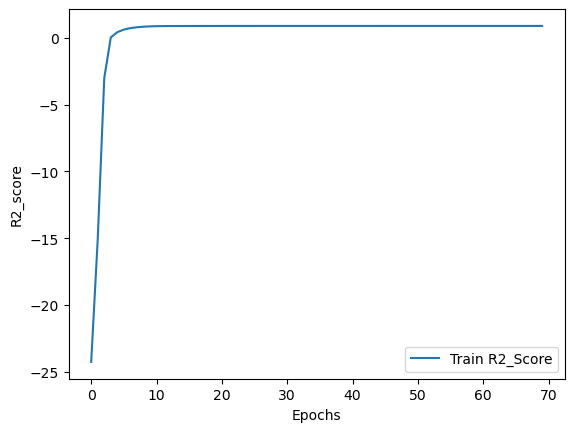

In [36]:
# Plot training history
plt.plot(history.history['r2_score'], label='Train R2_Score')
plt.xlabel("Epochs")
plt.ylabel("R2_score")
plt.legend()
plt.show()